In [2]:
import pandas as pd 
import numpy as np  
from scipy.stats import norm    
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('AMZN.csv',index_col='Date',parse_dates=True)
df.head(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-24,2417.000000,2420.429932,2382.000000,2410.219971,2410.219971,3831800
2020-04-27,2443.199951,2444.879883,2363.000000,2376.000000,2376.000000,5645600
2020-04-28,2372.100098,2373.500000,2306.000000,2314.080078,2314.080078,5269400
2020-04-29,2330.010010,2391.889893,2310.000000,2372.709961,2372.709961,4591600
2020-04-30,2419.840088,2475.000000,2396.010010,2474.000000,2474.000000,9534600
2020-05-01,2336.800049,2362.439941,2258.189941,2286.040039,2286.040039,9772600
2020-05-04,2256.379883,2326.979980,2256.379883,2315.989990,2315.989990,4865900
2020-05-05,2340.000000,2351.000000,2307.129883,2317.800049,2317.800049,3242500
2020-05-06,2329.439941,2357.449951,2320.000000,2351.260010,2351.260010,3117800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-04-24 to 2021-04-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


Insights about the Data


(array([18383., 18444., 18506., 18567., 18628., 18687., 18748.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

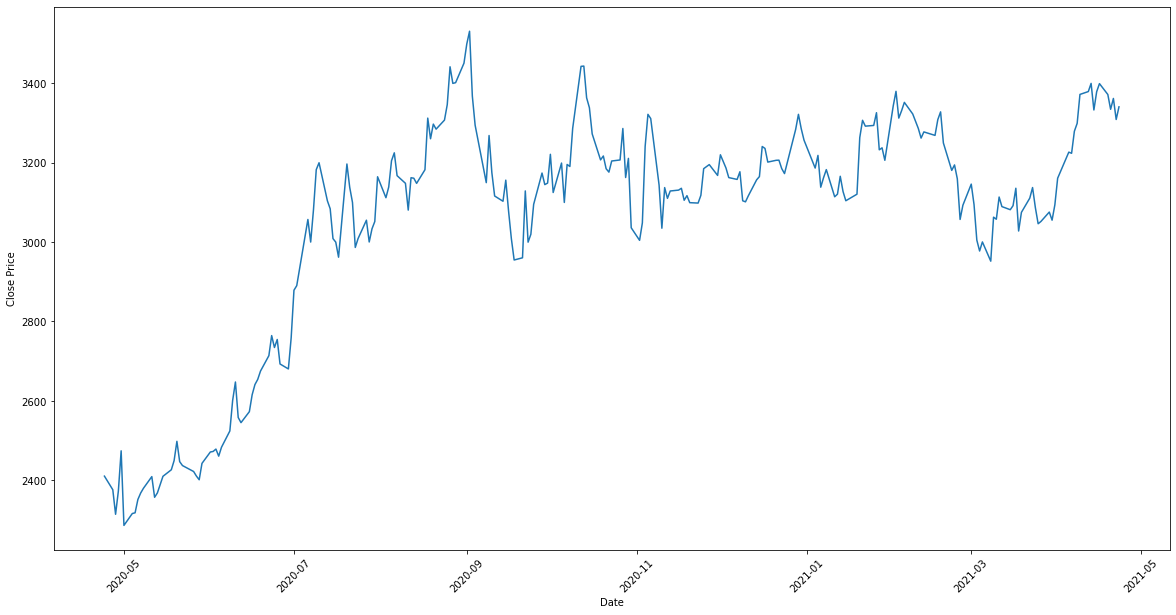

In [5]:
plt.figure(figsize=(20,10))
plt.plot(df.index,'Close',data=df)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

[Text(0, 0.5, 'Price')]

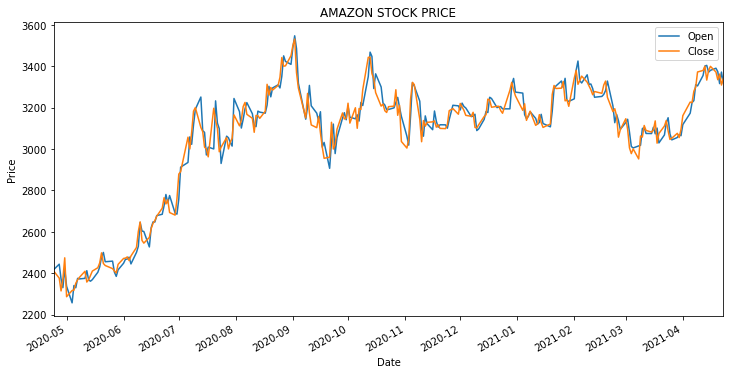

In [6]:
#plot both the Close and the Open price
ax=df[['Open','Close']].plot(figsize=(12,6),title='AMAZON STOCK PRICE')
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='Price')

we explore the dataset by adding new variables 

In [7]:
#Create some useful columns for us to make some interesting inferences about the stock
df['Daily Lag'] = df['Close'].shift(1)
#Daily lag :shifting the ‘Close’ price by one day back
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Lag
Date,,,,,,,
2020-04-24,2417.000000,2420.429932,2382.00000,2410.219971,2410.219971,3831800,NaN
2020-04-27,2443.199951,2444.879883,2363.00000,2376.000000,2376.000000,5645600,2410.219971
2020-04-28,2372.100098,2373.500000,2306.00000,2314.080078,2314.080078,5269400,2376.000000
2020-04-29,2330.010010,2391.889893,2310.00000,2372.709961,2372.709961,4591600,2314.080078
2020-04-30,2419.840088,2475.000000,2396.01001,2474.000000,2474.000000,9534600,2372.709961


In [8]:
#The reason for creating the ‘Daily Lag’ is to allowus to create the column ‘Daily Returns’
df['Daily Returns'] = (df['Daily Lag']/df['Close'])-1
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns
Date,,,,,,,,
2020-04-24,2417.000000,2420.429932,2382.00000,2410.219971,2410.219971,3831800,NaN,NaN
2020-04-27,2443.199951,2444.879883,2363.00000,2376.000000,2376.000000,5645600,2410.219971,0.014402
2020-04-28,2372.100098,2373.500000,2306.00000,2314.080078,2314.080078,5269400,2376.000000,0.026758
2020-04-29,2330.010010,2391.889893,2310.00000,2372.709961,2372.709961,4591600,2314.080078,-0.024710
2020-04-30,2419.840088,2475.000000,2396.01001,2474.000000,2474.000000,9534600,2372.709961,-0.040942


In [9]:
#Stats of Daily Return
mean = df['Daily Returns'].mean()
std = df['Daily Returns'].std()
print(mean)
print(std)
#the return if you buy and sell on the same day, you will make a loss.

-0.0010910543119835813
0.02048112951745724


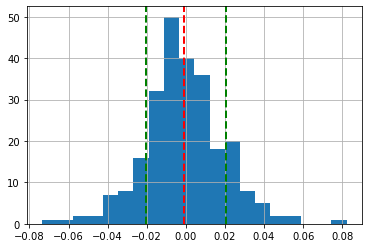

In [10]:
#plotting
df['Daily Returns'].hist(bins=20)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)

In [11]:
#the gap between the Close price and the day-after Open price
df['Delta_open_close_day_before_%']=((df['Open']-df['Close'].shift(1))/df['Close'].shift(1))*100

In [12]:
df['Delta_open_close_day_before_%']

Date
2020-04-24         NaN
2020-04-27    1.368339
2020-04-28   -0.164137
2020-04-29    0.688392
2020-04-30    1.986342
                ...   
2021-04-19   -0.267981
2021-04-20    0.047155
2021-04-21   -0.560470
2021-04-22    0.287325
2021-04-23    0.304017
Name: Delta_open_close_day_before_%, Length: 252, dtype: float64

<AxesSubplot:xlabel='Date', ylabel='Delta_open_close_day_before_%'>

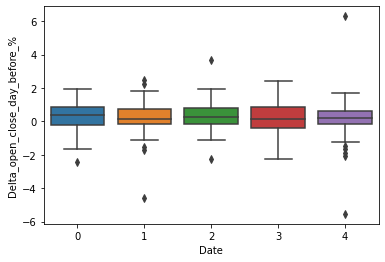

In [13]:
#plot this new variable grouped by the weeks :
#Stability Observed in Gaps Although, we observe several outliers.
sns.boxplot(x=df.index.weekday,y=df['Delta_open_close_day_before_%'])

In [14]:
#Let’s add now a second variable, which measures in % the amplitude in the daily stock price between the High price variable and the Low price variable :
df['delta_high_low_%']=((df['High']-df['Low'])/df['Low'])*100

<AxesSubplot:xlabel='Date', ylabel='delta_high_low_%'>

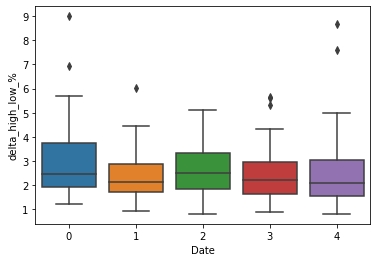

In [15]:
sns.boxplot(x=df.index.weekday, y=df['delta_high_low_%'])

In [16]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns,Delta_open_close_day_before_%,delta_high_low_%
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02,251.000000,251.000000,251.000000,252.000000
mean,3058.179487,3094.608522,3016.206307,3055.317771,3055.317771,4.291205e+06,3054.180074,-0.001091,0.217957,2.607382
std,298.644225,300.373885,293.283735,295.336919,295.336919,1.487467e+06,295.373169,0.020481,1.082485,1.269048
min,2256.379883,2326.979980,2256.379883,2286.040039,2286.040039,1.451900e+06,2286.040039,-0.073469,-5.545673,0.815282
25%,3021.590087,3072.137512,2973.022461,3008.835083,3008.835083,3.172400e+06,3008.800049,-0.012098,-0.215836,1.748203
50%,3146.160034,3182.000000,3105.410034,3138.604980,3138.604980,3.981750e+06,3138.379883,-0.002121,0.213144,2.315693
75%,3234.110046,3284.482483,3184.662537,3236.465088,3236.465088,5.088675e+06,3234.330078,0.009935,0.767960,3.192446
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,9.772600e+06,3531.449951,0.082221,6.295140,8.991691


In [17]:
df

,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns,Delta_open_close_day_before_%,delta_high_low_%
Date,,,,,,,,,,
2020-04-24,2417.000000,2420.429932,2382.000000,2410.219971,2410.219971,3831800,NaN,NaN,NaN,1.613347
2020-04-27,2443.199951,2444.879883,2363.000000,2376.000000,2376.000000,5645600,2410.219971,0.014402,1.368339,3.465082
2020-04-28,2372.100098,2373.500000,2306.000000,2314.080078,2314.080078,5269400,2376.000000,0.026758,-0.164137,2.927147
2020-04-29,2330.010010,2391.889893,2310.000000,2372.709961,2372.709961,4591600,2314.080078,-0.024710,0.688392,3.545017
2020-04-30,2419.840088,2475.000000,2396.010010,2474.000000,2474.000000,9534600,2372.709961,-0.040942,1.986342,3.296730
...,...,...,...,...,...,...,...,...,...,...
2021-04-19,3390.330078,3435.929932,3360.159912,3372.010010,3372.010010,2725400,3399.439941,0.008135,-0.267981,2.254953
2021-04-20,3373.600098,3382.989990,3316.000000,3334.689941,3334.689941,2623000,3372.010010,0.011191,0.047155,2.020205
2021-04-21,3316.000000,3362.860107,3303.810059,3362.020020,3362.020020,2211200,3334.689941,-0.008129,-0.560470,1.787332
